# 0.0. IMPORTS

In [106]:
import pandas as pd

import numpy as np

import inflection

import math

import seaborn as sns

from matplotlib import pyplot as plt

from IPython.core.display import HTML

### 0.1. Helper functions

### 0.2. Loading data

In [34]:
df_sales_raw = pd.read_csv ('train.csv', low_memory=False)

In [35]:
df_store_raw = pd.read_csv ('store.csv', low_memory=False)

In [36]:
# Merge

In [37]:
df_raw = pd.merge (df_sales_raw, df_store_raw, how='left', on='Store')

In [38]:
#Verificando o merge

In [39]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
371011,1105,7,2014-08-10,0,0,0,0,0,0,c,c,330.0,11.0,2008.0,1,5.0,2013.0,"Feb,May,Aug,Nov"


# 1.0. DESCRICAO DOS DADOS

In [40]:
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## 1.1. Rename Columns

In [41]:
df1 = df_raw.copy()

In [42]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
            'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment','CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore (x)

cols_new = list(map(snakecase, cols_old))

# Rename
df1.columns = cols_new

In [43]:
# Verificando Rename método snakecase
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2. Data Dimensions

In [44]:
df1.shape

(1017209, 18)

## 1.3. Data types

In [45]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [46]:
#Alterando formato data
df1['date'] = pd.to_datetime (df1['date'])

In [47]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NA's

In [48]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout NA's

In [51]:
#competition_distance verificando valor maximo atual
df1 ['competition_distance'].max()

75860.0

In [75]:
#competition_distance
df1 ['competition_distance'] = df1 ['competition_distance'].apply( lambda x: 200000.0 if math.isnan (x) else x)

#competition_open_since_month  
df1 ['competition_open_since_month'] = df1.apply (lambda x: x ['date'].month if math.isnan (x ['competition_open_since_month']) else x ['competition_open_since_month'], axis=1)

#competition_open_since_year
df1 ['competition_open_since_year'] = df1.apply (lambda x: x ['date'].year if math.isnan (x ['competition_open_since_year']) else x ['competition_open_since_year'], axis=1)
                             
#promo2_since_week 
df1 ['promo2_since_week'] = df1.apply (lambda x: x ['date'].week if math.isnan (x ['promo2_since_week']) else x ['promo2_since_week'], axis=1)

#promo2_since_year
df1 ['promo2_since_year'] = df1.apply (lambda x: x ['date'].year if math.isnan (x ['promo2_since_year']) else x ['promo2_since_year'], axis=1)

#promo_interval 
month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'} 

df1 ['promo_interval'].fillna(0, inplace =True)
df1 ['month_map'] = df1 ['date'].dt.month.map(month_map)
df1 ['is_promo'] = df1[['promo_interval','month_map']].apply (lambda x: 0 if x ['promo_interval'] == 0 else 1 if x ['month_map'] in x ['promo_interval'].split (',') else 0, axis=1)

In [72]:
#Verificando coluna criada month_map
df1.sample(5).T

,879149,325814,228222,216328,214712
store,200,734,763,19,633
day_of_week,6,6,4,7,2
date,2013-05-04 00:00:00,2014-09-27 00:00:00,2015-01-08 00:00:00,2015-01-18 00:00:00,2015-01-20 00:00:00
sales,7286,1519,5821,0,5020
customers,959,181,534,0,405
open,1,1,1,0,1
promo,0,0,1,0,0
state_holiday,0,0,0,0,0
school_holiday,0,0,0,0,0
store_type,a,a,d,a,d


In [74]:
# Verificando alteracoes NA's
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6. Change Types

In [76]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [78]:
# Convertendo de float para int
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)

df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

In [79]:
#Verificando correcoes
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7. Descriptive Statistical

In [81]:
num_attributes = df1.select_dtypes (include = ['int64','int32', 'float64'])
cat_attributes = df1.select_dtypes (exclude = ['int64', 'float64','int32','datetime64[ns]'])

In [82]:
#Verificando
num_attributes.sample(2)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
251362,26,1,13695,878,1,1,0,2300.0,12,2014,0,51,2014,0
337502,177,7,0,0,0,0,0,1250.0,2,2004,1,5,2013,0


In [83]:
#Verificando
cat_attributes.sample(2)

,state_holiday,store_type,assortment,promo_interval,month_map
769477,0,a,a,0,Aug
144292,0,c,a,0,Mar


### 1.7.1 Numerical Attributes

In [90]:
#Central Tendency - Mean and Median
ct1 = pd.DataFrame (num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame (num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew and kurtosis
d1 = pd.DataFrame (num_attributes.apply(np.std)).T
d2 = pd.DataFrame (num_attributes.apply(min)).T
d3 = pd.DataFrame (num_attributes.apply(max)).T
d4 = pd.DataFrame (num_attributes.apply (lambda x: x.max() - x.min())).T
d5 = pd.DataFrame (num_attributes.apply (lambda x: x.skew () )).T
d6 = pd.DataFrame (num_attributes.apply (lambda x: x.kurtosis () )).T

#Concatenate
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


C:\Users\Pamela.magalhaes\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

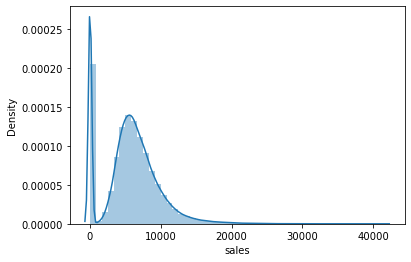

In [109]:
sns.distplot (df1['sales'])

C:\Users\Pamela.magalhaes\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='competition_distance', ylabel='Density'>

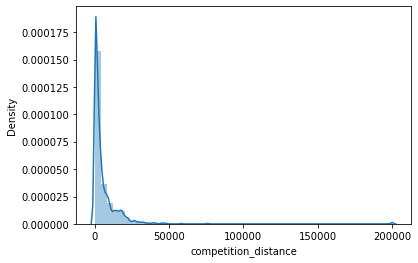

In [108]:
sns.distplot (df1['competition_distance'])

### 1.7.2 Categorical Attributes

In [99]:
cat_attributes.apply (lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

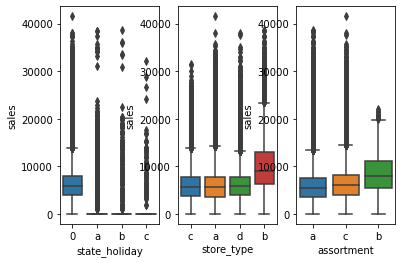

In [107]:
aux1 = df1[(df1['state_holiday'] != '0' ) & (df1['sales'] > 0) ]

plt.subplot(1,3,1)
sns.boxplot (x='state_holiday', y='sales',data=df1)

plt.subplot(1,3,2)
sns.boxplot (x='store_type', y='sales',data=df1)

plt.subplot(1,3,3)
sns.boxplot (x='assortment', y='sales',data=df1)
